<a href="https://colab.research.google.com/github/PetrovES570/PDA_SOL/blob/main/LAB_2_Petrov_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 2. Парсинг HTML. XPath+Selenium

**Цель работы:** научиться извлекать данные из HTML-страниц с использованием XPath.
Практически применить навыки парсинга для сбора данных с веб-страниц.



### Ход работы:

In [1]:
#1. Импорт необходимых библиотек:

import requests
from lxml import html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#2. Отправка GET-запроса к целевому URL:

url = 'https://fred.stlouisfed.org/data/TOTALSL'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36 Edg/129.0.0.0'}
response = requests.get(url, headers=headers)
if response.status_code == 200:
 page_content = response.content
else:
 print(f"Ошибка при получении страницы: {response.status_code}")
 exit()

In [3]:
#3. Парсинг HTML-страницы с использованием lxml:

tree = html.fromstring(page_content)
tree

<Element html at 0x7a77fa6f3100>

In [23]:
#4. Использование XPath для извлечения данных.

#XPath для извлечения дат
DATA = tree.xpath('//table[@id="data-table-observations"]/tbody/tr/th[@scope="row"]/text()')

#XPath для извлечения значений
amount = tree.xpath('//table[@id="data-table-observations"]/tbody/tr/td/text()')

In [32]:
#5. Создание DataFrame.

data = {
 'DATA': DATA,
 'total_amount': amount
}
df = pd.DataFrame(data)
df

,DATA,total_amount
0,1943-01-01,6.57783
1,1943-02-01,6.46304
2,1943-03-01,6.23421
3,1943-04-01,6.12575
4,1943-05-01,5.93626
...,...,...
974,2024-03-01,5047.61260
975,2024-04-01,5051.29425
976,2024-05-01,5063.01684
977,2024-06-01,5068.24452


In [33]:
df

,DATA,total_amount
0,1943-01-01,6.57783
1,1943-02-01,6.46304
2,1943-03-01,6.23421
3,1943-04-01,6.12575
4,1943-05-01,5.93626
...,...,...
974,2024-03-01,5047.61260
975,2024-04-01,5051.29425
976,2024-05-01,5063.01684
977,2024-06-01,5068.24452


In [38]:
# Этап 1: Удаление дубликатов
df.drop_duplicates(inplace=True)

# Этап 2: Обработка пропусков в столбце DATA
df['DATA'].fillna(method='ffill', inplace=True)  # Заполнение методом ближайшего впереди идущего значения

# Этап 3: Преобразование формата даты в datetime
df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')  # Преобразование с обработкой ошибок

# Этап 4: Обработка пропусков и ошибок в столбце total_amount
df['total_amount'].replace('NaN', np.nan, inplace=True)  # Замена строкового 'NaN' на действительный np.nan
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')  # Преобразование в числовой формат, ошибки превращаются в NaN

# Этап 5: Удаление строк, где DATA или total_amount - NaN
df.dropna(subset=['DATA', 'total_amount'], inplace=True)

# Этап 6: Приведение total_amount к положительным значениям
df['total_amount'] = df['total_amount'].abs()  # Ограничение только положительных значений


<ipython-input-38-f6c313619d67>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['DATA'].fillna(method='ffill', inplace=True)  # Заполнение методом ближайшего впереди идущего значения


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATA          979 non-null    datetime64[ns]
 1   total_amount  979 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.4 KB


In [40]:
# Проверка на пропущенные значения
print(df.isnull().sum())

DATA            0
total_amount    0
dtype: int64


In [41]:
#7. Анализ данных.
print(df.describe())

                                DATA  total_amount
count                            979    979.000000
mean   1983-10-01 08:39:13.421859008   1170.615922
min              1943-01-01 00:00:00      5.354360
25%              1963-05-16 12:00:00     71.605365
50%              1983-10-01 00:00:00    423.773000
75%              2004-02-15 12:00:00   2102.530340
max              2024-07-01 00:00:00   5093.696630
std                              NaN   1415.817968


In [13]:
# Дата и значение максимальной ставки
max_rate_index = df['Rate'].idxmax()
max_rate_date = df.loc[max_rate_index, 'Dates']
max_rate_value = df.loc[max_rate_index, 'Rate']

print(f"Максимальная ставка: {max_rate_value}% на дату {max_rate_date}")

Максимальная ставка: 5093.69663% на дату 2024-07-01 00:00:00


In [43]:
min_amount_index = df['total_amount'].idxmin()
min_amount_date = df.loc[min_amount_index, 'DATA']
min_amount_value = df.loc[min_amount_index, 'total_amount']

# Находим индекс максимальной суммы
max_amount_index = df['total_amount'].idxmax()
max_amount_date = df.loc[max_amount_index, 'DATA']
max_amount_value = df.loc[max_amount_index, 'total_amount']

# Вычисляем, во сколько раз максимальная сумма больше минимальной
ratio = max_amount_value / min_amount_value

# Выводим результаты
print(f"Минимальная сумма потребительского кредита(в млрд $): {min_amount_value} на дату {min_amount_date}")
print(f"Максимальная сумма потребительского кредита(в млрд $): {max_amount_value} на дату {max_amount_date}")
print(f"Максимальная сумма в {ratio} раз больше минимальной суммы(в млрд $)")

Минимальная сумма потребительского кредита(в млрд $): 5.35436 на дату 1944-02-01 00:00:00
Максимальная сумма потребительского кредита(в млрд $): 5093.69663 на дату 2024-07-01 00:00:00
Максимальная сумма в 951.3175486892926 раз больше минимальной суммы(в млрд $)


In [46]:

# Создаем колонку с пятилетиями
df['Five_Year_Period'] = (df['DATA'].dt.year // 5) * 5

# Рассчитываем среднюю сумму за каждые 5 лет
average_amounts = df.groupby('Five_Year_Period')['total_amount'].mean().astype(int)

# Выводим результат
print(average_amounts)

Five_Year_Period
1940       5
1945      11
1950      27
1955      45
1960      67
1965     106
1970     160
1975     254
1980     397
1985     670
1990     833
1995    1284
2000    1903
2005    2487
2010    2860
2015    3744
2020    4628
Name: total_amount, dtype: int64


            total_amount  Five_Year_Period
DATA                                      
1953-12-31    516.874995          0.515464
1963-12-31    127.265430          0.512821
1973-12-31    148.214561          0.510204
1983-12-31    129.931793          0.507614
1993-12-31     98.058169          0.505051
2003-12-31    139.976815          0.502513
2013-12-31     48.768955          0.500000
2023-12-31     62.554537          0.497512
2033-12-31      1.393417          0.000000


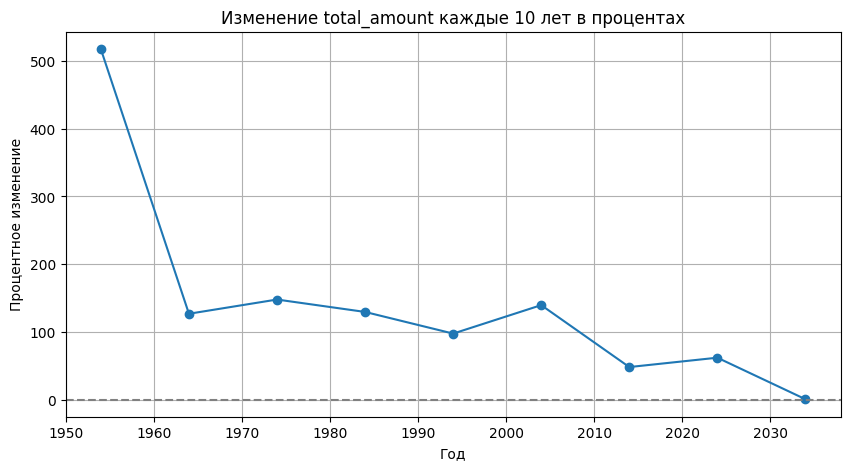

In [53]:

# Группируем данные по 10-летним интервалам
df_10_years = df.resample('10Y').last()

# Рассчитываем процентное изменение каждые 10 лет
percentage_change = df_10_years.pct_change() * 100

# Удаляем первый NaN
percentage_change.dropna(inplace=True)

# Печатаем результаты
print(percentage_change)

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(percentage_change.index, percentage_change['total_amount'], marker='o')
plt.title('Изменение total_amount каждые 10 лет в процентах')
plt.xlabel('Год')
plt.ylabel('Процентное изменение')
plt.grid()
plt.axhline(0, color='grey', linestyle='--')
plt.show()


> Рост объема потребительских кредитов с 1950 по 2030 годы обусловлен рядом факторов, таких как увеличение доходов населения, развитие кредитных технологий и финансовых услуг, а также изменение потребительских привычек. В послевоенный период произошел экономический бум, что способствовало росту уверенности в финансовом благосостоянии и увеличению потребительских расходов. С появлением новых форм кредитования, таких как кредитные карты и онлайн-кредиты, доступ к финансам стал проще, что способствовало росту секьюритизированных кредитов. В XXI веке, в условиях цифровизации и экономических изменений, таких как глобализация, также наблюдается увеличение долга, что приводит к дальнейшему росту потребительского кредитования и создает новые вызовы для управления этими обязательствами.



> **РАБОТА С ИСПОЛЬЗОВАНИЕМ SELENIUM**

---





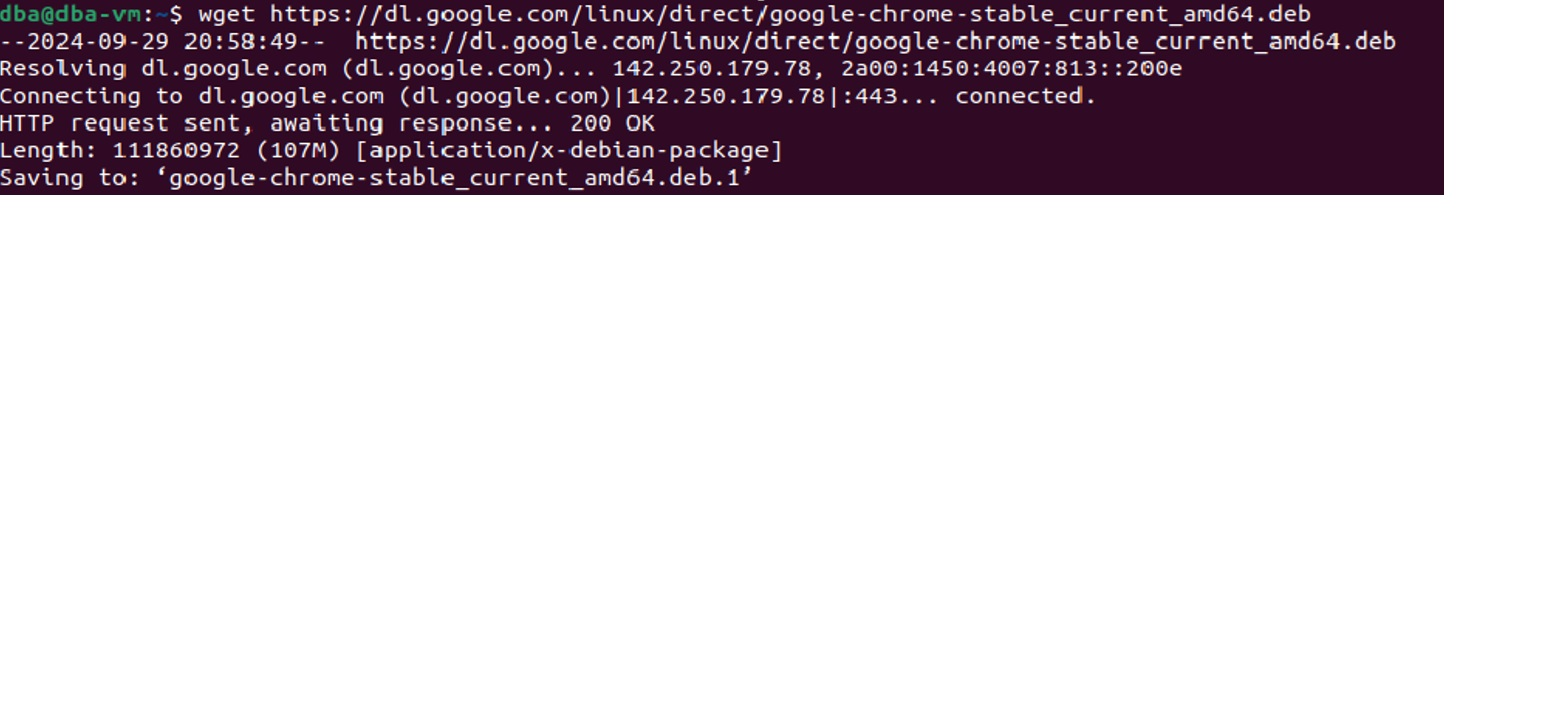

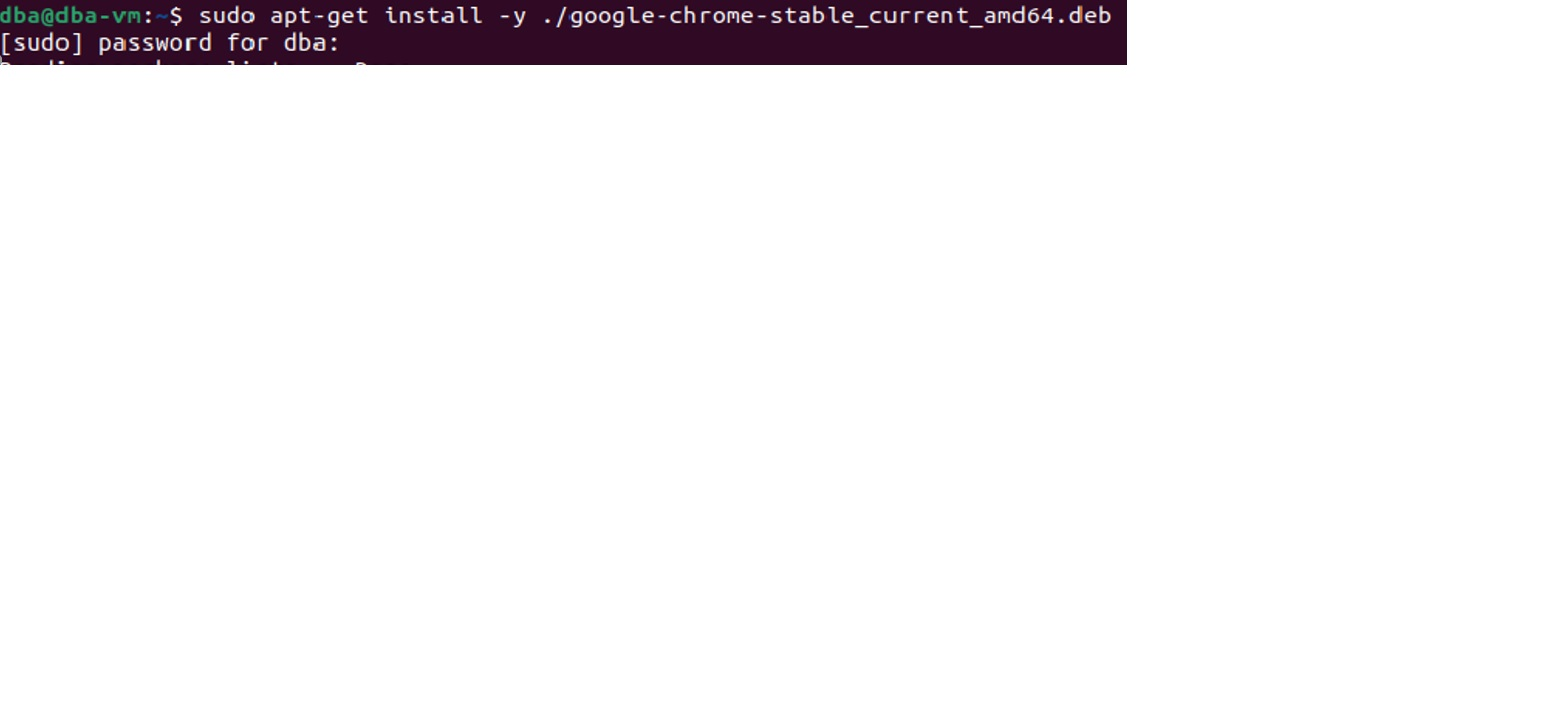

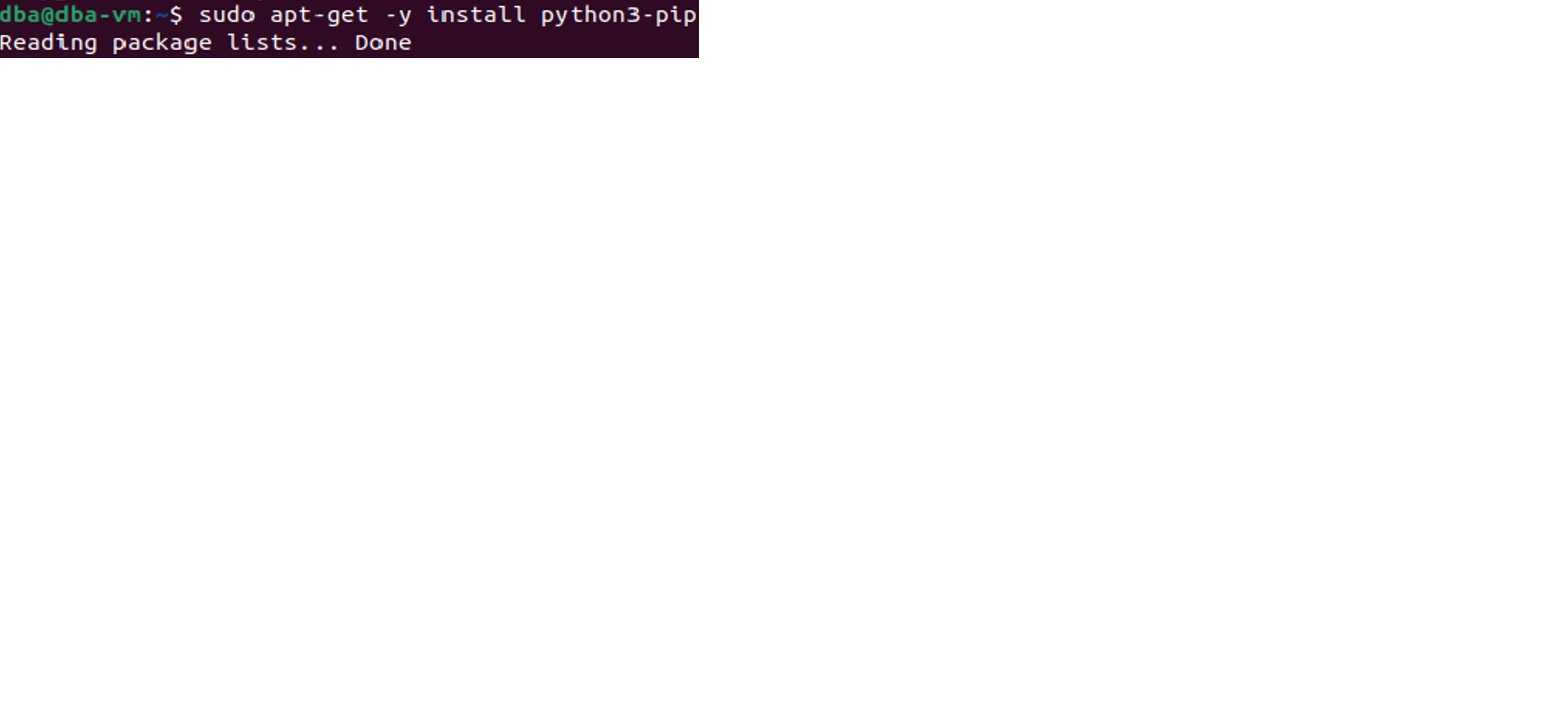

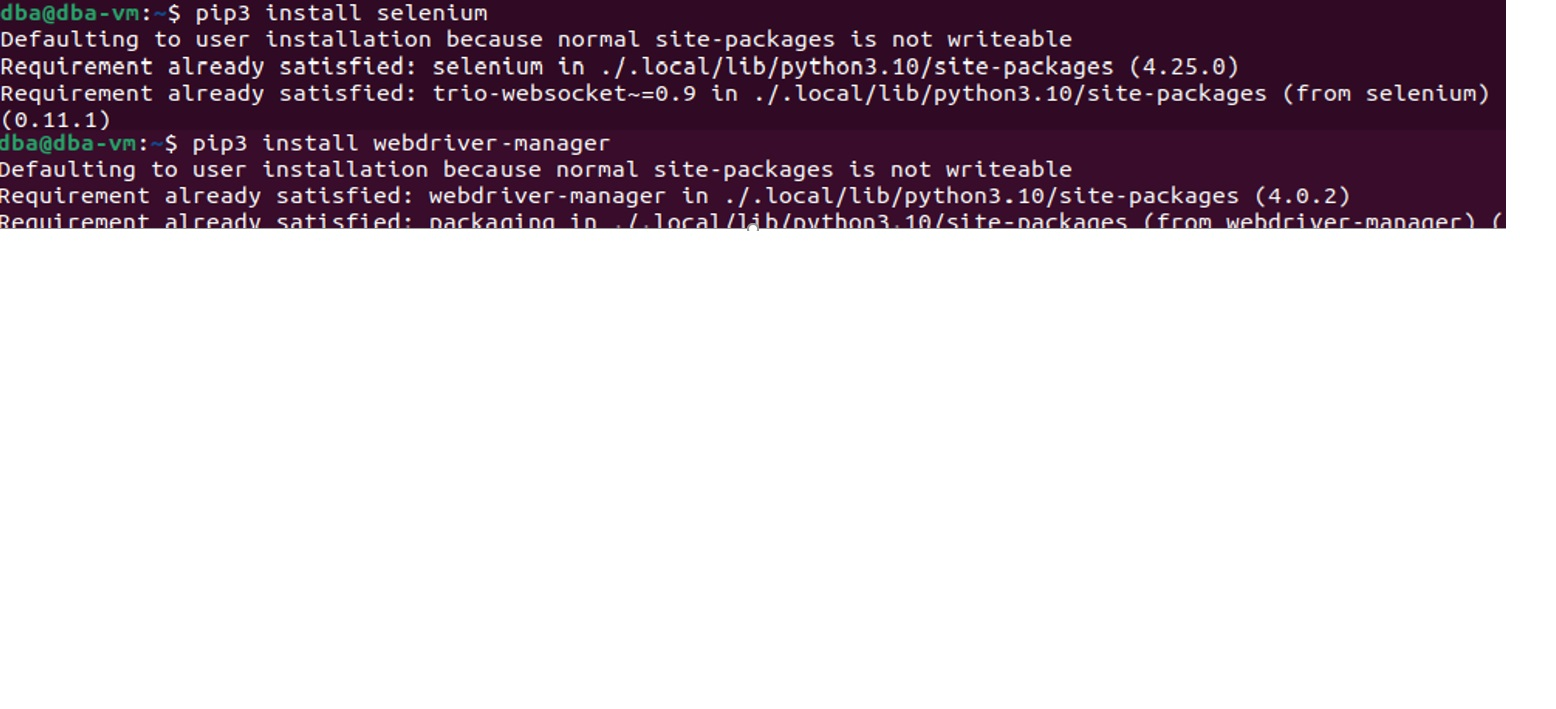

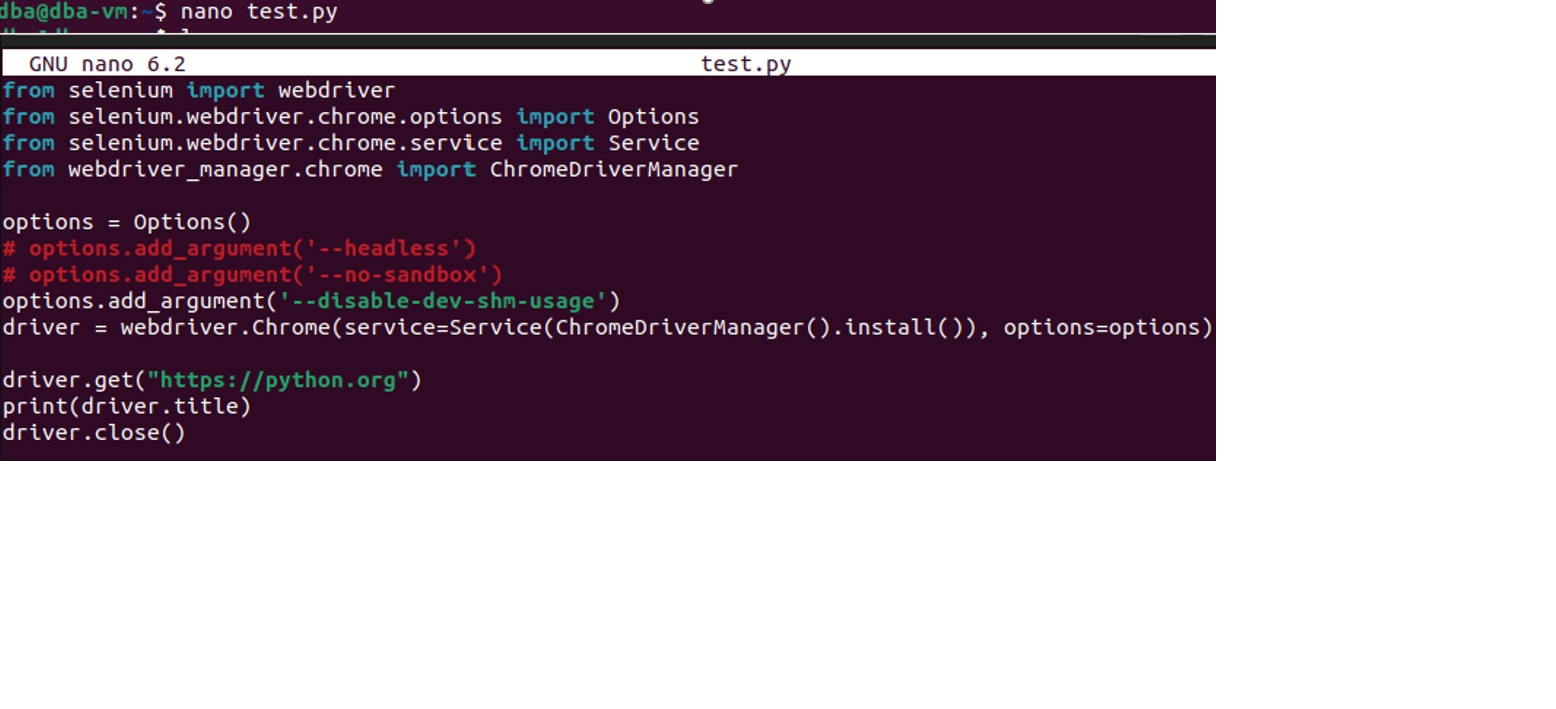

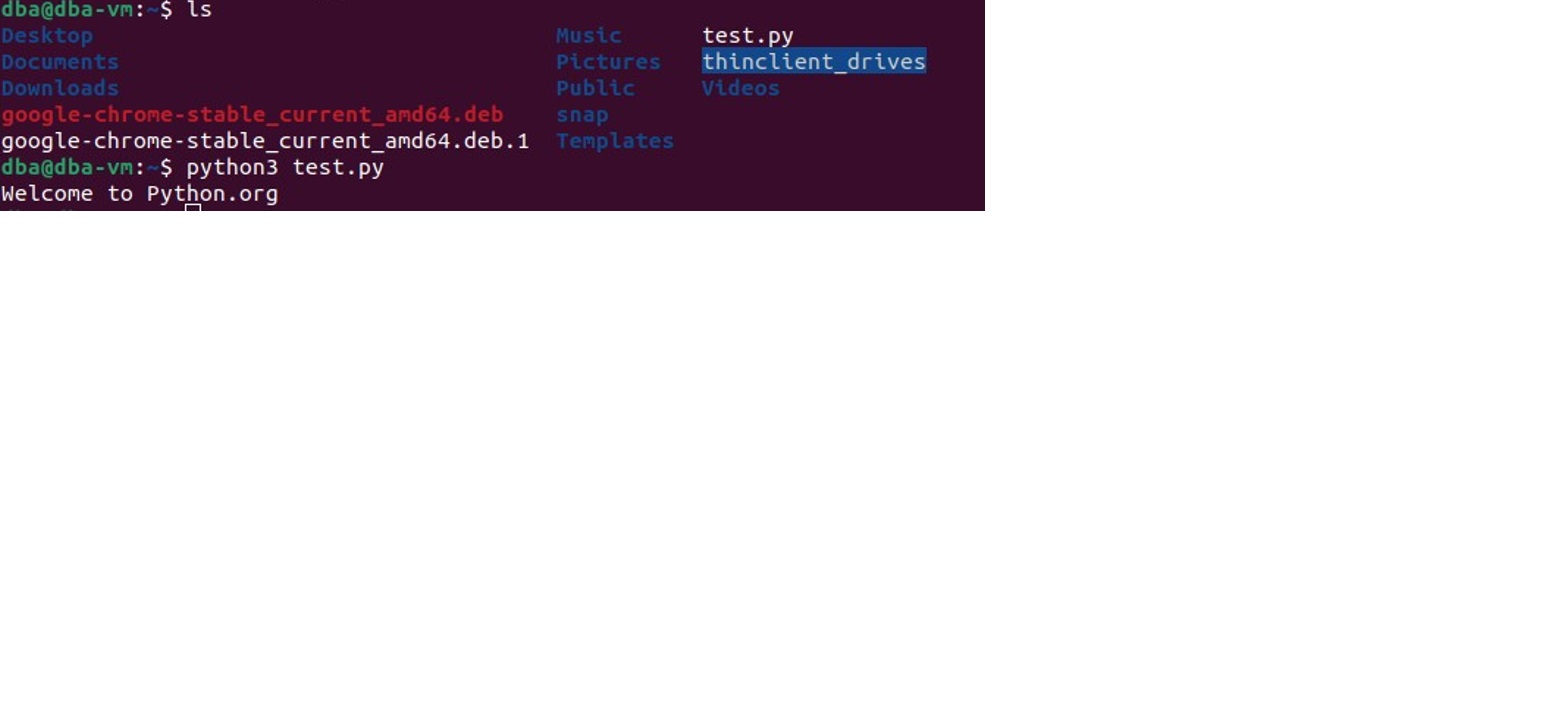

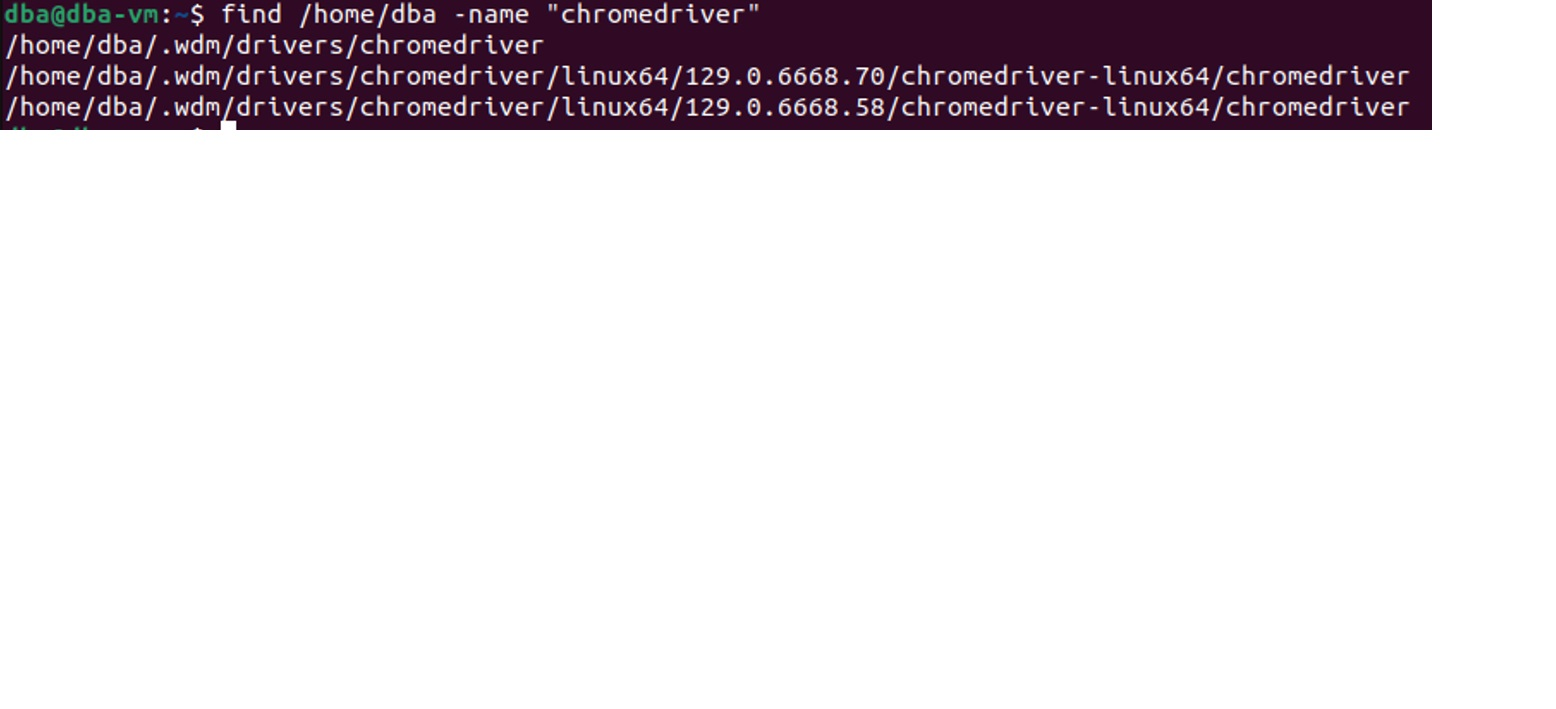

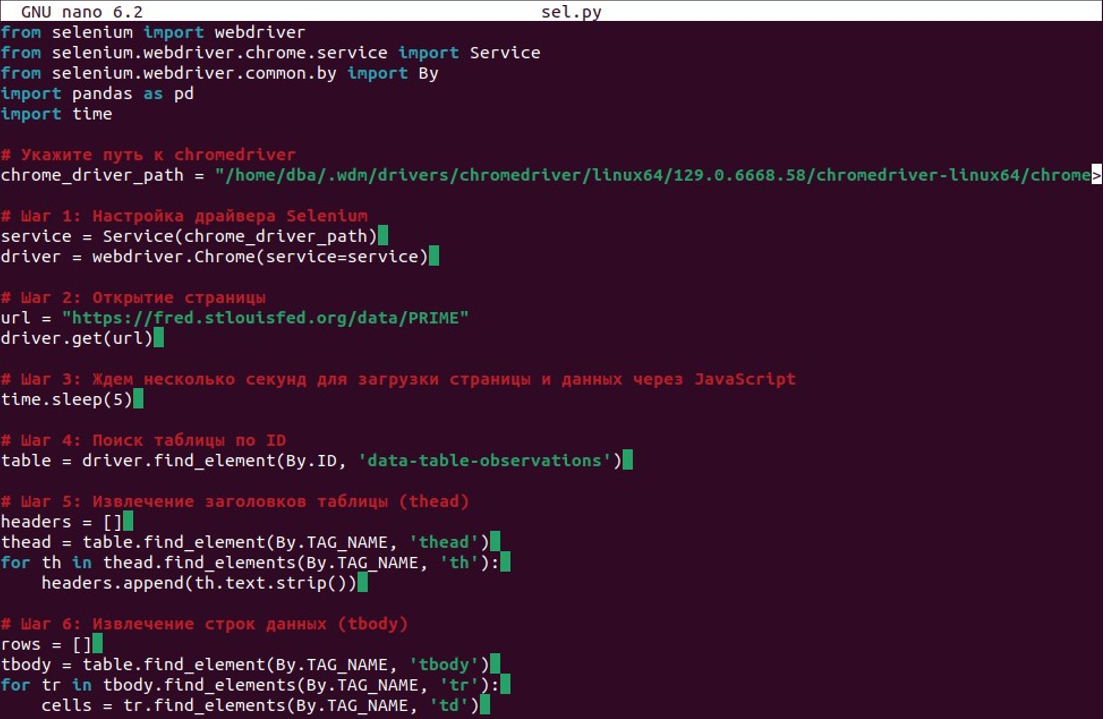

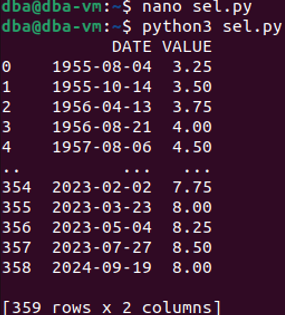